<a href="https://colab.research.google.com/github/viyer-research/ProgramingAssignment2/blob/master/LoadingCatAndDogsFromGDrive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls drive/MyDrive/Data/train/
dataset_home = 'drive/MyDrive/Data/train/'


cat.0.jpg      cat.1499.jpg  cat.4246.jpg  cat.6995.jpg  cat.9742.jpg
cat.10000.jpg  cat.149.jpg   cat.4247.jpg  cat.6996.jpg  cat.9743.jpg
cat.10001.jpg  cat.14.jpg    cat.4248.jpg  cat.6997.jpg  cat.9744.jpg
cat.10002.jpg  cat.1500.jpg  cat.4249.jpg  cat.6998.jpg  cat.9745.jpg
cat.10003.jpg  cat.1501.jpg  cat.424.jpg   cat.6999.jpg  cat.9746.jpg
cat.10004.jpg  cat.1502.jpg  cat.4250.jpg  cat.699.jpg	 cat.9747.jpg
cat.10005.jpg  cat.1503.jpg  cat.4251.jpg  cat.69.jpg	 cat.9748.jpg
cat.10006.jpg  cat.1504.jpg  cat.4252.jpg  cat.6.jpg	 cat.9749.jpg
cat.10007.jpg  cat.1505.jpg  cat.4253.jpg  cat.7000.jpg  cat.974.jpg
cat.10008.jpg  cat.1506.jpg  cat.4254.jpg  cat.7001.jpg  cat.9750.jpg
cat.10009.jpg  cat.1507.jpg  cat.4255.jpg  cat.7002.jpg  cat.9751.jpg
cat.1000.jpg   cat.1508.jpg  cat.4256.jpg  cat.7003.jpg  cat.9752.jpg
cat.10010.jpg  cat.1509.jpg  cat.4257.jpg  cat.7004.jpg  cat.9753.jpg
cat.10011.jpg  cat.150.jpg   cat.4258.jpg  cat.7005.jpg  cat.9754.jpg
cat.10012.jpg  cat.1510.jpg

!ls

In [ ]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = 'cats_vs_dogs_small/'
subdirs = ['train/', 'test/', 'validation/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
val_hi = 0.5
# copy training dataset images into subdirectories
src_directory = 'drive/MyDrive/Data/train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() > val_hi:
		dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if random() > val_ratio < val_hi:
		dst_dir = 'validation/'
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)
  

Found 2864 files belonging to 2 classes.
Found 11473 files belonging to 2 classes.
Found 952 files belonging to 2 classes.
Epoch 1/20
90/90 [==============================] - 3s 24ms/step - loss: 15.0163 - accuracy: 0.9515 - val_loss: 5.3491 - val_accuracy: 0.9657
Epoch 2/20
90/90 [==============================] - 2s 19ms/step - loss: 1.7540 - accuracy: 0.9867 - val_loss: 9.7365 - val_accuracy: 0.9662
Epoch 3/20
90/90 [==============================] - 2s 19ms/step - loss: 1.9076 - accuracy: 0.9885 - val_loss: 5.4612 - val_accuracy: 0.9781
Epoch 4/20
90/90 [==============================] - 2s 20ms/step - loss: 0.7566 - accuracy: 0.9948 - val_loss: 5.9895 - val_accuracy: 0.9778
Epoch 5/20
90/90 [==============================] - 2s 23ms/step - loss: 0.4486 - accuracy: 0.9969 - val_loss: 4.9895 - val_accuracy: 0.9801
Epoch 6/20
90/90 [==============================] - 2s 22ms/step - loss: 0.5890 - accuracy: 0.9951 - val_loss: 5.4605 - val_accuracy: 0.9787
Epoch 7/20
90/90 [============

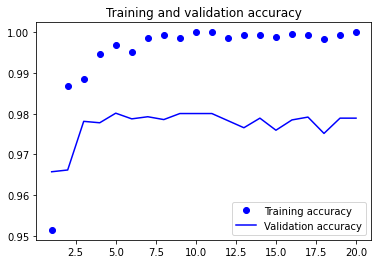

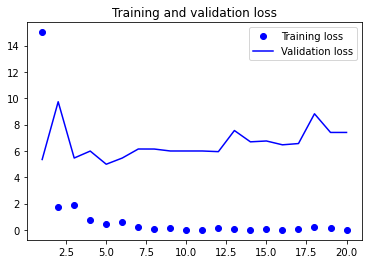

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0
Epoch 1/50
90/90 [==============================] - 100s 1s/step - loss: 9.7921 - accuracy: 0.9410 - val_loss: 4.0035 - val_accuracy: 0.9764
Epoch 2/50
90/90 [==============================] - 97s 1s/step - loss: 4.2137 - accuracy: 0.9644 - val_loss: 4.1226 - val_accuracy: 0.9779
Epoch 3/50
90/90 [==============================] - 97s 1s/step - loss: 3.8782 - accuracy: 0.9700 - val_loss: 4.5727 - val_accuracy: 0.9775
Epoch 4/50
90/90 [==============================] - 98s 1s/step - loss: 2.3843 - accuracy: 0.9780 - val_loss: 5.7592 - val_accuracy: 0.9686
Epoch 5/50
90/90 [==============================] - 98s 1s/step - loss: 2.9523 - accuracy: 0.9749 - val_loss: 4.9993 - val_accuracy: 0.9732
Epoch 6/50
90/90 [==============================] - 97s 1s/step - loss: 2.3797 - accuracy: 0.9770 - val_loss: 6.8393 - val_accuracy: 0.9679
Epoch 7/50
90

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

from tensorflow.keras.utils import image_dataset_from_directory
import os, shutil, pathlib
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np
import matplotlib.pyplot as plt

# original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)
    

conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))
    


def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)
    
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))
      
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

conv_base.summary()

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")    